## Senate Voting Patterns Using Hierarchical Clustering

The goal is to apply Hierarchical Clustering to uncover patterns in the voting behavior, grouping senators into clusters based on their voting similarities. This can help identify groups of senators who vote similarly on certain bills, offering insights into political alliances, cross-party voting behavior, or regional voting trends.

**Importing libraries**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from sklearn.cluster import AgglomerativeClustering

**Importing Data Set**

In [3]:
data=pd.read_csv('/kaggle/input/u-s-senate-voting-dataset/114_congress.csv')
df_senate= data.copy()

**display dataset**

In [4]:
df_senate.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
df_senate.shape

(100, 18)

In [6]:
df_senate.dtypes

name        object
party       object
state       object
Bill_1     float64
Bill_4     float64
Bill_5     float64
Bill_6     float64
Bill_7     float64
Bill_8     float64
Bill_9     float64
Bill_10    float64
Bill_20    float64
Bill_26    float64
Bill_32    float64
Bill_38    float64
Bill_39    float64
Bill_44    float64
Bill_47    float64
dtype: object

**Check for Null Values**

In [7]:
# Check for missing values in each column
missing_values = df_senate.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
name       0
party      0
state      0
Bill_1     0
Bill_4     0
Bill_5     0
Bill_6     0
Bill_7     0
Bill_8     0
Bill_9     0
Bill_10    0
Bill_20    0
Bill_26    0
Bill_32    0
Bill_38    0
Bill_39    0
Bill_44    0
Bill_47    0
dtype: int64


**check total missing values**

In [8]:
# Total missing values in the dataset
total_missing = df_senate.isnull().sum().sum()

print(f"Total Missing Values in the Dataset: {total_missing}")

Total Missing Values in the Dataset: 0


**Display Unique Values for Each Column**

In [9]:
# Loop through each column and print the unique values
for column in df_senate.columns:
    unique_values = df_senate[column].unique()
    count_values  = len(df_senate[column].unique())
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: name
Unique Values: ['Alexander' 'Ayotte' 'Baldwin' 'Barrasso' 'Bennet' 'Blumenthal' 'Blunt'
 'Booker' 'Boozman' 'Boxer' 'Brown' 'Burr' 'Cantwell' 'Capito' 'Cardin'
 'Carper' 'Casey' 'Cassidy' 'Coats' 'Cochran' 'Collins' 'Coons' 'Corker'
 'Cornyn' 'Cotton' 'Crapo' 'Cruz' 'Daines' 'Donnelly' 'Durbin' 'Enzi'
 'Ernst' 'Feinstein' 'Fischer' 'Flake' 'Franken' 'Gardner' 'Gillibrand'
 'Graham' 'Grassley' 'Hatch' 'Heinrich' 'Heitkamp' 'Heller' 'Hirono'
 'Hoeven' 'Inhofe' 'Isakson' 'Johnson' 'Kaine' 'King' 'Kirk' 'Klobuchar'
 'Lankford' 'Leahy' 'Lee' 'Manchin' 'Markey' 'McCain' 'McCaskill'
 'McConnell' 'Menendez' 'Merkley' 'Mikulski' 'Moran' 'Murkowski' 'Murphy'
 'Murray' 'Nelson' 'Paul' 'Perdue' 'Peters' 'Portman' 'Reed' 'Reid'
 'Risch' 'Roberts' 'Rounds' 'Rubio' 'Sanders' 'Sasse' 'Schatz' 'Schumer'
 'Scott' 'Sessions' 'Shaheen' 'Shelby' 'Stabenow' 'Sullivan' 'Tester'
 'Thune' 'Tillis' 'Toomey' 'Udall' 'Vitter' 'Warner' 'Warren' 'Whitehouse'
 'Wicker' 'Wyden']

total count unique value

In [10]:
df_senate.head()

,name,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
df_senate.columns

Index(['name', 'party', 'state', 'Bill_1', 'Bill_4', 'Bill_5', 'Bill_6',
       'Bill_7', 'Bill_8', 'Bill_9', 'Bill_10', 'Bill_20', 'Bill_26',
       'Bill_32', 'Bill_38', 'Bill_39', 'Bill_44', 'Bill_47'],
      dtype='object')

**set index of dataset**

In [12]:
df_senate.set_index('name',inplace=True)

In [13]:
df_senate

,party,state,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,,,
Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


**The decision of the actual variable and the actual variable remove or not**

The decision of whether to remove actual variables (also known as features) before applying hierarchical clustering depends on several factors, including the nature of the data, the clustering objective, and the specific hierarchical clustering algorithm being used.

After forming clusters based on voting patterns, we can observe whether senators from the same political party (as indicated in the party column) tend to vote similarly and thus fall into the same cluster .

The "party column " identifies each senator’s political party, clustering based on the voting patterns across multiple bills will show whether senators' actual voting behavior aligns with their party affiliation.

In this case, we drop the actual variable, the 'party' column, from the dataset before performing clustering.

In [14]:
Y=df_senate['party']

In [15]:
Y.head()

name
Alexander    R
Ayotte       R
Baldwin      D
Barrasso     R
Bennet       D
Name: party, dtype: object

In [16]:
Y.value_counts()

party
R    54
D    44
I     2
Name: count, dtype: int64

- The 'state' column is dropped due to its data type being an object

In [17]:
X = df_senate.drop(['party','state'], axis = 1)

In [18]:
X

,Bill_1,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,Bill_20,Bill_26,Bill_32,Bill_38,Bill_39,Bill_44,Bill_47
name,,,,,,,,,,,,,,,
Alexander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Ayotte,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Baldwin,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Barrasso,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
Bennet,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Warren,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
Whitehouse,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


**Number of Clusters**

In [46]:
Z = hierarchy.linkage(X, 'complete')

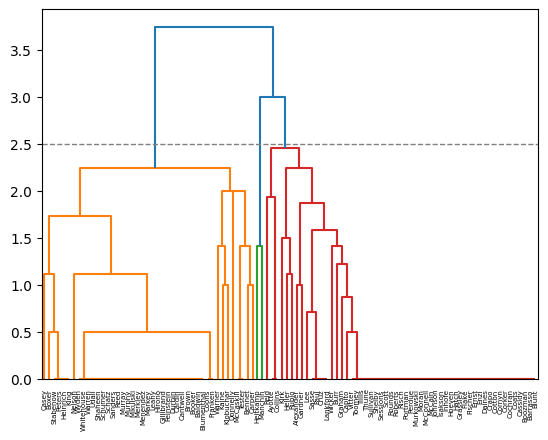

In [47]:
# Control number of clusters in the plot + add horizontal line.
hierarchy.dendrogram(Z, color_threshold=2.5,labels=X.index,leaf_rotation=90)
plt.axhline(y=2.5, c='grey', lw=1, linestyle='dashed')

Number of cluster is 3

### Hierarchical Clustering

Ward is the default linkage algorithm, so we'll start with that

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

In [21]:
ward_pred

array([2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0])

Let's also try complete and average linkages

**Task 3:**:
* Conduct hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```
* Conduct hierarchical clustering with average linkage, store the predicted labels in the variable ```avg_pred```

In [22]:
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(X)

In [37]:
complete_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [38]:
# Hierarchical clustering using complete linkage
# Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(X)

# Hierarchical clustering using average linkage
# # Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(X)

**adjusted rand score**

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

In [25]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(Y, ward_pred)

In [26]:
ward_ar_score

0.8110199642721615

**Task 4**:
* Calculate the Adjusted Rand score of the clusters resulting from complete linkage and average linkage

In [27]:
# Write the code to calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

# Write the code to calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

Which algorithm results in the higher Adjusted Rand Score?

In [28]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8110199642721615 
Complete:  0.8944016485750291 
Average:  0.8944016485750291


**Contingency Table**

In [30]:
Y.value_counts()

party
R    54
D    44
I     2
Name: count, dtype: int64

In [31]:
print(pd.crosstab(complete_pred, df_senate["party"]))

party   D  I   R
row_0           
0       1  0  54
1      41  2   0
2       2  0   0


Column 'party' Labels (D, I, R):

D: Could represent "Democrats"

I: Could represent "Independents"

R: Could represent "Republicans"

These labels denote political affiliations.


Interpreting the Rows:

- Row 0:
[1 0 54]

The values are [1,0,54], indicating that there are 1 occurrences for party with Democrats , and 54 occurrences for party with Republicans , but none for Independents party.

The vast majority of people (54) belong to the Republican party, while only 1 person is a Democrat and none are Independents.


- Row 1:
[41 2 0]

The values are [41,2,0], indicating that there are 41 occurrences for party with Democrats , and 2 occurrences for party with Independents , but none for Republicans party.

The majority of people are Democrats (41), a small number are Independents (2), and none are Republicans

- Row 2:
[2 0 0]

The values are [2,0,0], indicating that there are 2 occurrences for party with Democrats , and 0 occurrences for party with Independents , but none(0) for Republicans party.

There are only 2 people, and both are Democrats. No Independents or Republicans are present in this category.



General Observation:

- Row 0 is dominated by Republicans.
- Row 1 is dominated by Democrats, with a small presence of Independents.
- Row 2 only includes Democrats, with no representation from Independents or Republicans.

## 3. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

**Task 5:** Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values. Pick the one that resulted in the highest Adjusted Rand Score

In [32]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

linkage_type = 'complete'

linkage_matrix = linkage(X, linkage_type)

**Task 6:**

Plot a dendogram using scipy's [dendrogram()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

- leaf_font_size=10
- labels=X.index
- orientation="right"
- figsize=(15,18)

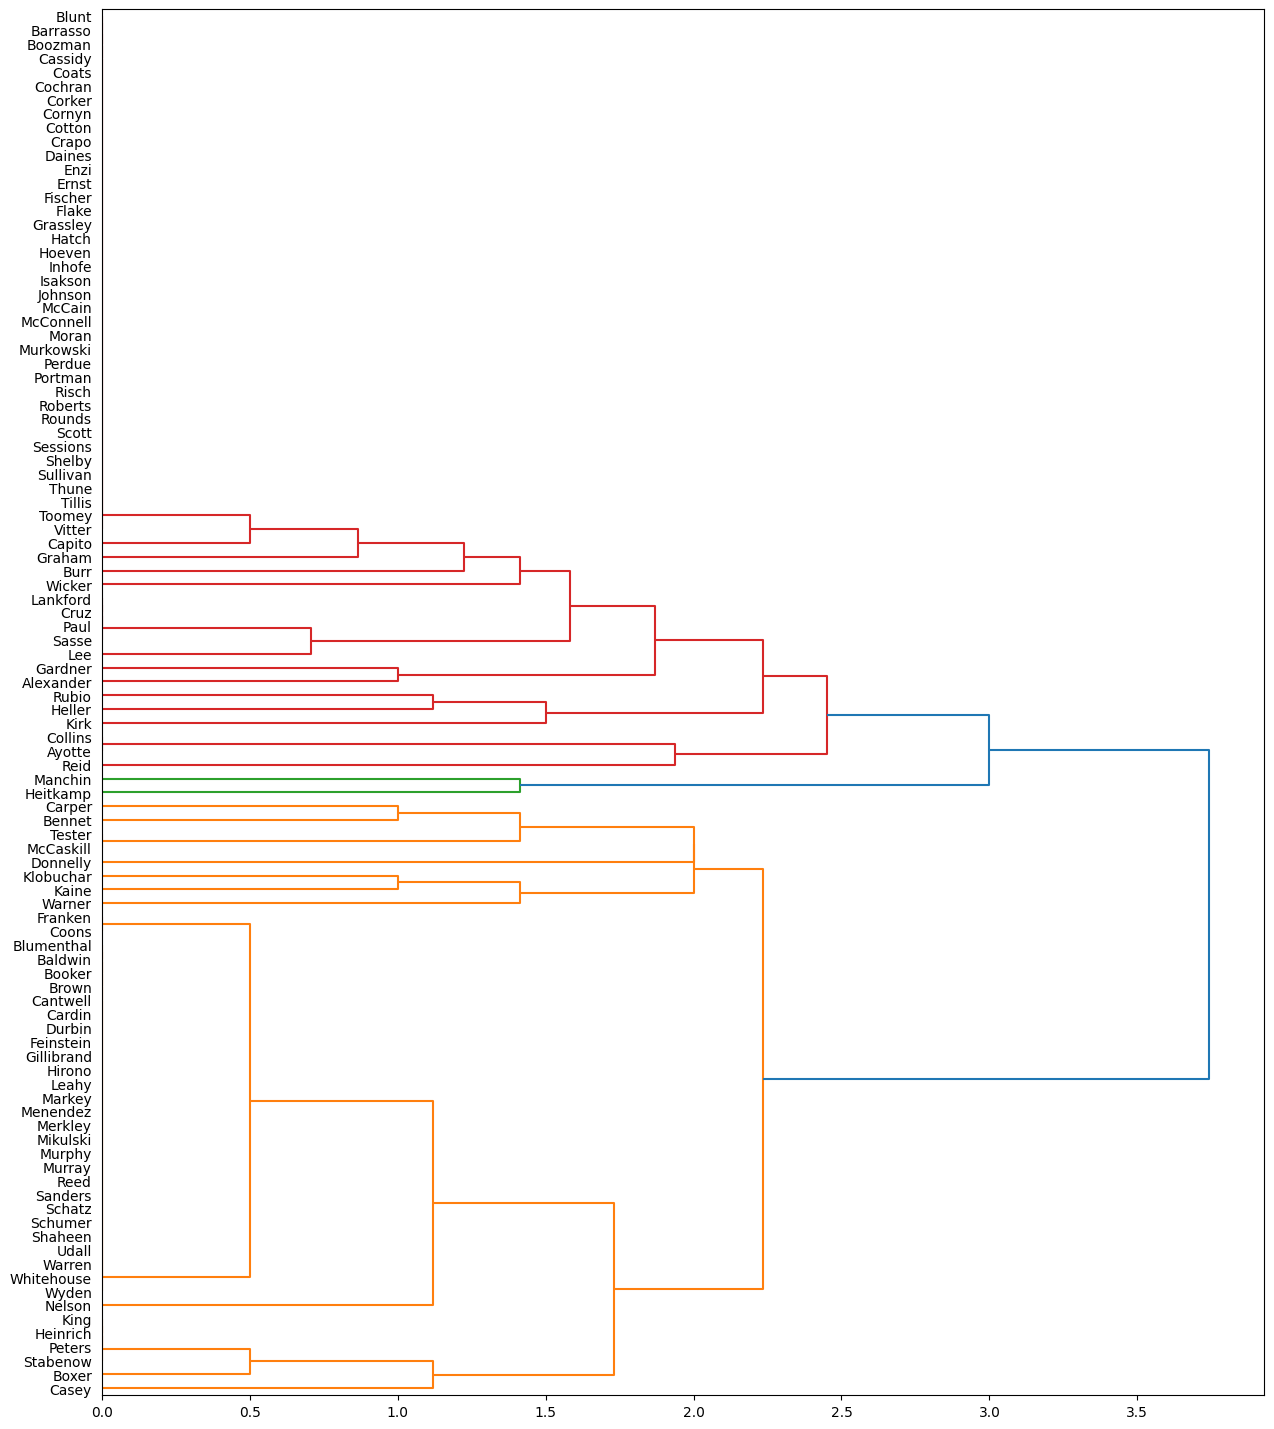

In [33]:
# write the code to plot using 'dendrogram()'

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,18))

dendrogram(linkage_matrix, leaf_font_size=10, labels=X.index,orientation="right" )

plt.show()

## 4. Visualization with Seaborn's ```clustermap``` 

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

In [34]:
lut = dict(zip(Y, "rbg"))
lut={'R': 'b', 'D': 'g', 'I':'k'}

In [35]:
lut = dict(zip(Y, "rbg"))
row_colors = Y.map(lut)
row_colors

name
Alexander     b
Ayotte        b
Baldwin       g
Barrasso      b
Bennet        g
             ..
Warner        g
Warren        g
Whitehouse    g
Wicker        b
Wyden         g
Name: party, Length: 100, dtype: object

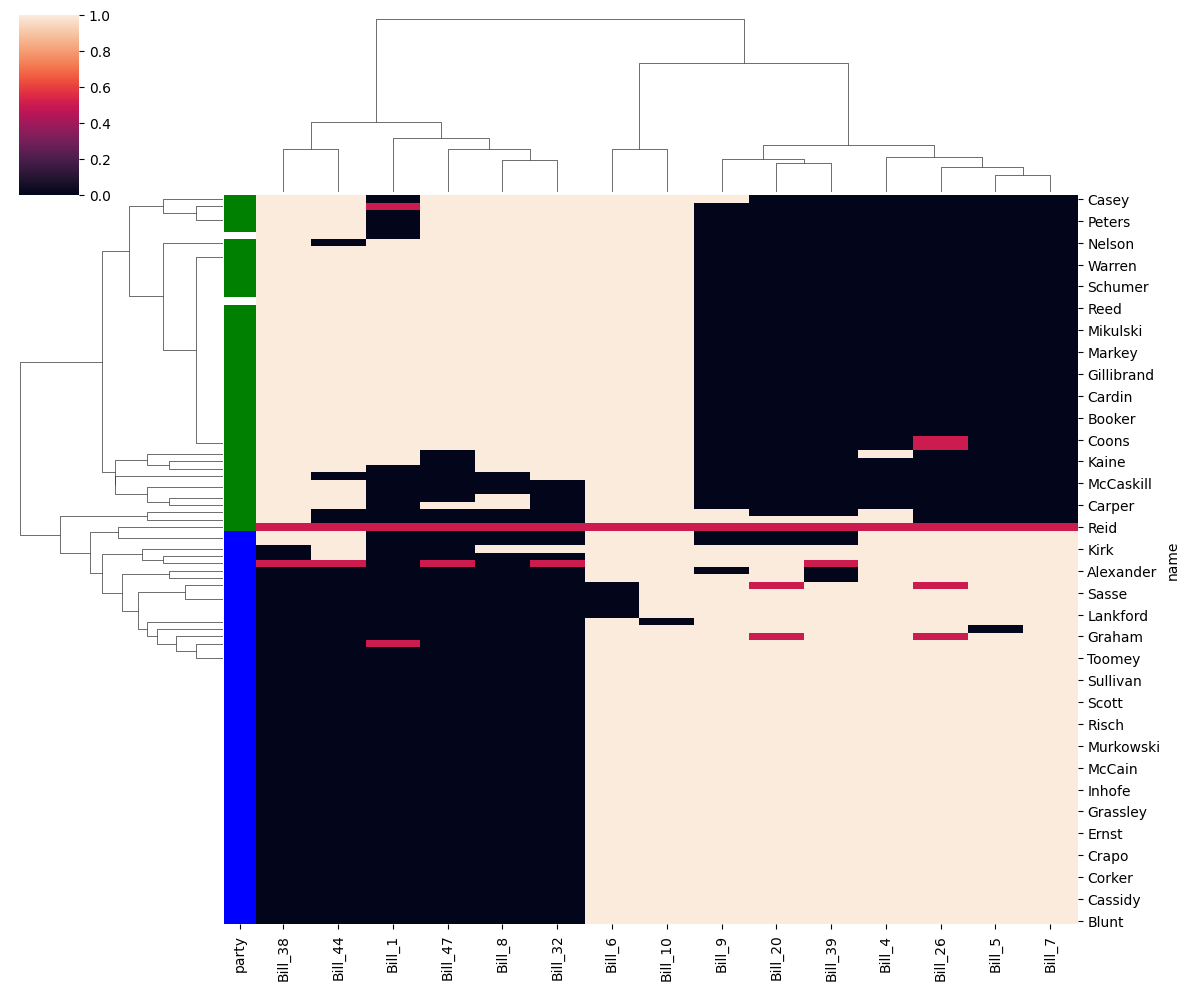

In [36]:
import seaborn as sns

sns.clustermap(X, row_colors=row_colors, figsize=(12,10),method='complete')
plt.show()

Looking at the colors of the dimensions can you observe how they different senators have voted. The bar on the extreme left shows the party they belong to. The plot on the whole shows which of the senators have voted, which have not and which of them have abstained. 